**607 Project Report**
# **Predictive Maintenance Classification of Industrial Machines**

******

**Member**
1. Yi-Chi Chang (30156294)
2. Yat Hei Fung (30183611)
3. Aung Khant Min (30160164)
4. Peerada Tarasub (30178664)
5. Hao Su (30191442)

# **1. Overview**

## 1.1 Introduction

Machine failure in industrial plant leads to large amount of cost and time to fix or replace the machine, which affect the performance of the whole production line. To avoid that, preventive maintenance is the practice that most industrial plants perform to reduce the event of sudden machine failure. Performing predictive maintenance can improve machine downtime, costs, control, and quality of production.

## 1.2 Objective

1. To compare the performance of different machine learning algorithms on predicting machine failures.
2. To classify the failure types of the failed machines.

***

# **2. Dataset**

The dataset is obtained from the UCI Machine Learning Repository, which is synthetic that reflects real predictive maintenance encountered in the industry because real datasets are generally difficult to obtain (UCI Machine Learning Repository 2020, Matzka, 2020). Performing predictive maintenance can improve machine downtime, costs, control, and quality of production (Zonta et al., 2020). The dataset contains six columns describing the characteristics of the machines, which are machine type, air temperature, process temperature, rotational speed, torque, and tool wear, that contribute to the failure status column. To distinguish between different failure types, another five columns are provided to address the failure modes of the machine (TWF, HDF, PWF, OSF, and RNF).

In [ ]:
# Import the dataset
import pandas as pd
df = pd.read_csv("/content/sample_data/dataset_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
# Display the dataset schema
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [ ]:
# Rename the column
df = df.rename(columns= {"Air temperature [K]":"air_temp", "Process temperature [K]": "pro_temp", "Rotational speed [rpm]": "R_speed", "Torque [Nm]":"Torque", "Tool wear [min]": "Tool_wear", "Machine failure": "Machine_failure" })
df.head()

,UDI,Product ID,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


***

# **3. Methodology**

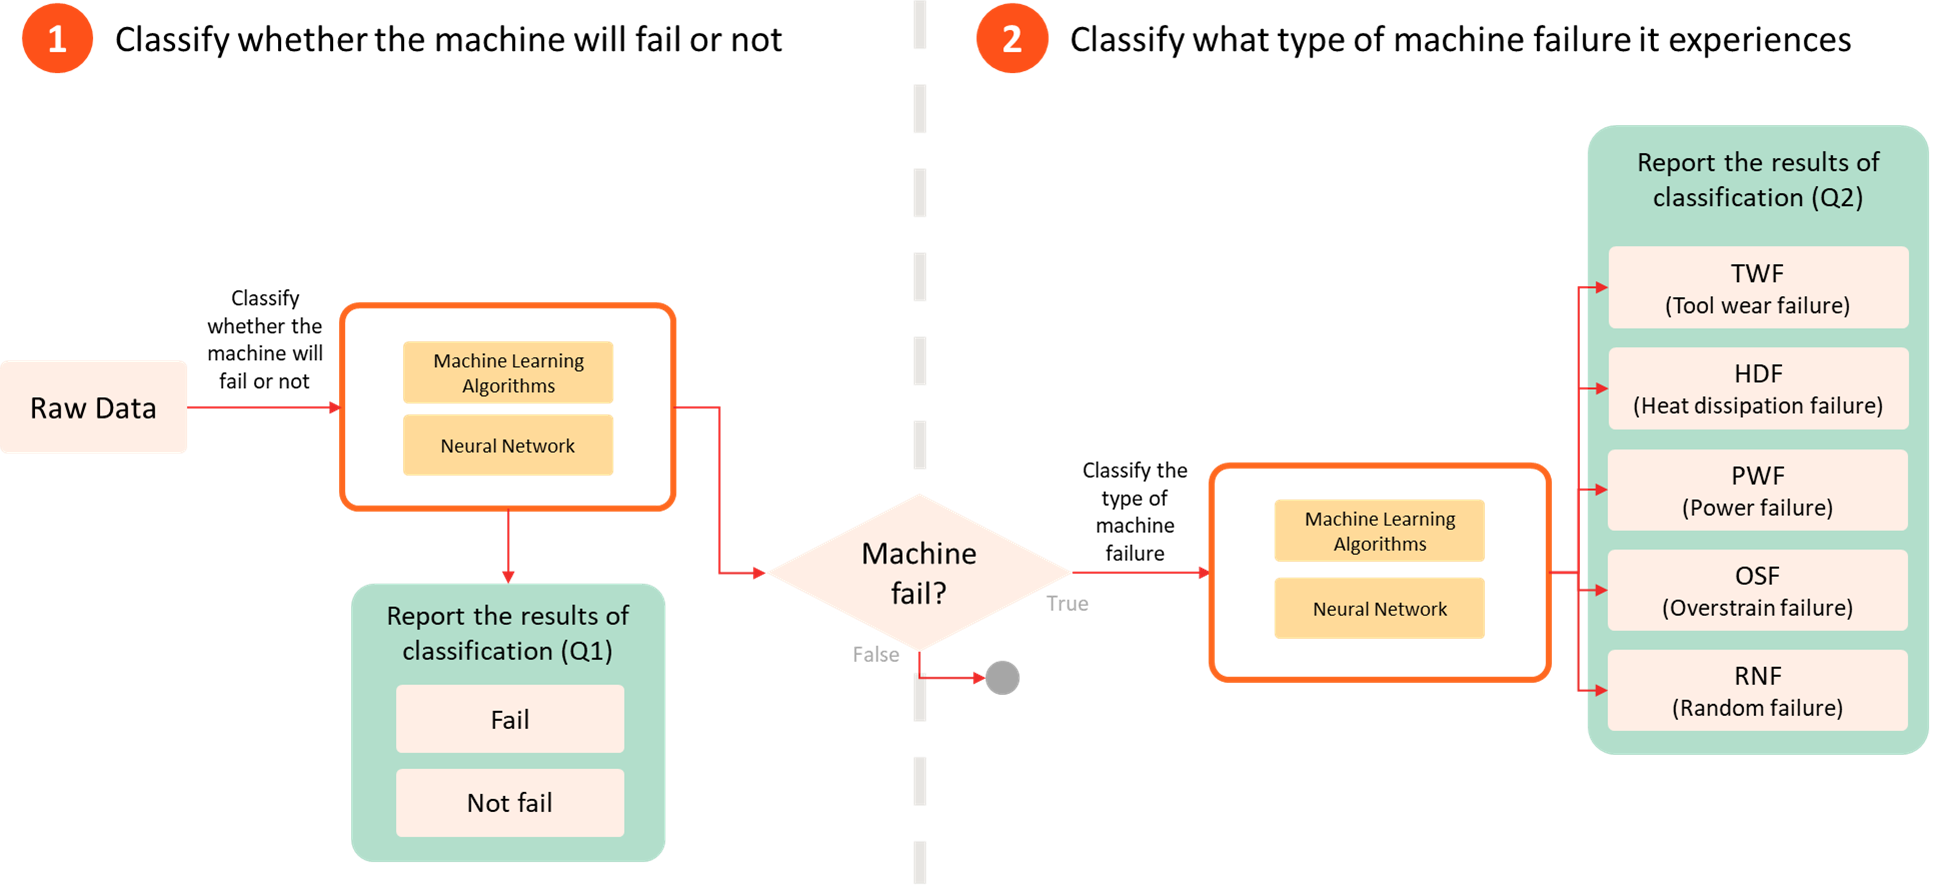

To reach both objectives, the methodology is divided into two parts:
*   First step is to classify whether the machine will fail or not by using various machine learning algorithms and neural network. After that, each model's performance is going to be compared by computing the accuracy and MSE.
*   Second step is to classify what type of machine failure it experiences among TWF (tool wear failure), HDF (heat dissipation failure), PWF (power failure), OSF (overstrain failure), or RNF (random failure). By doing this, only the failed machines are going to be filtered out to perform the analysis using the other sets of machine learning algorithms and neural network. After obtaining the results, the best algorithms will be picked to build a function to predict the type of failure, since one machine can face more than one type of failure.


### **3.1 Classify whether the machine will fail or not** 

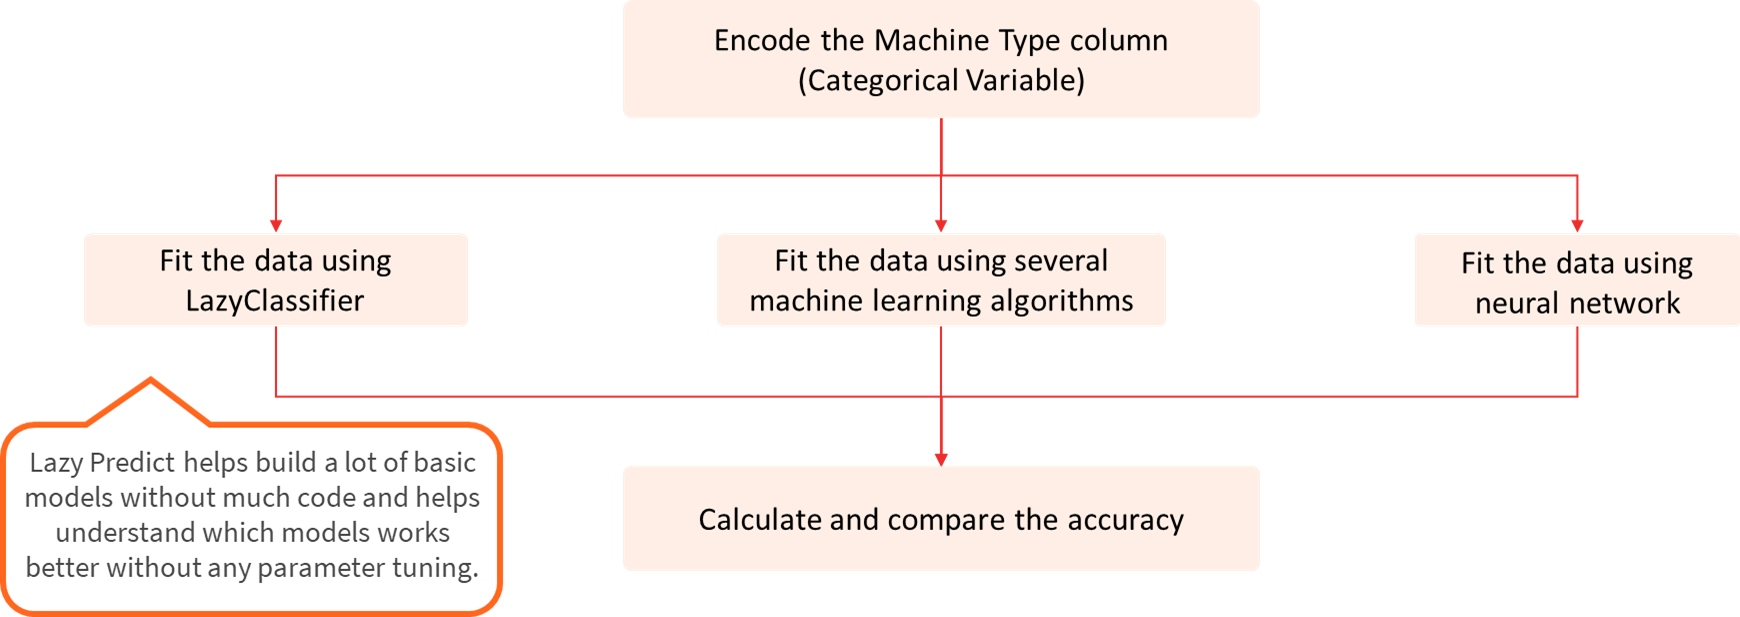

For the first objective, we will start the analysis by encoding the categorical variable, which is the Machine Type column. Then, the data will be fitted using Lazy Classifier to help build and determine the performance of basic models, using chosen machine learning algorithms, and lastly, using neural network. The accuracy will be computed and compared to find the best model.

### **3.2 Classify what type of machine failure it experiences** 

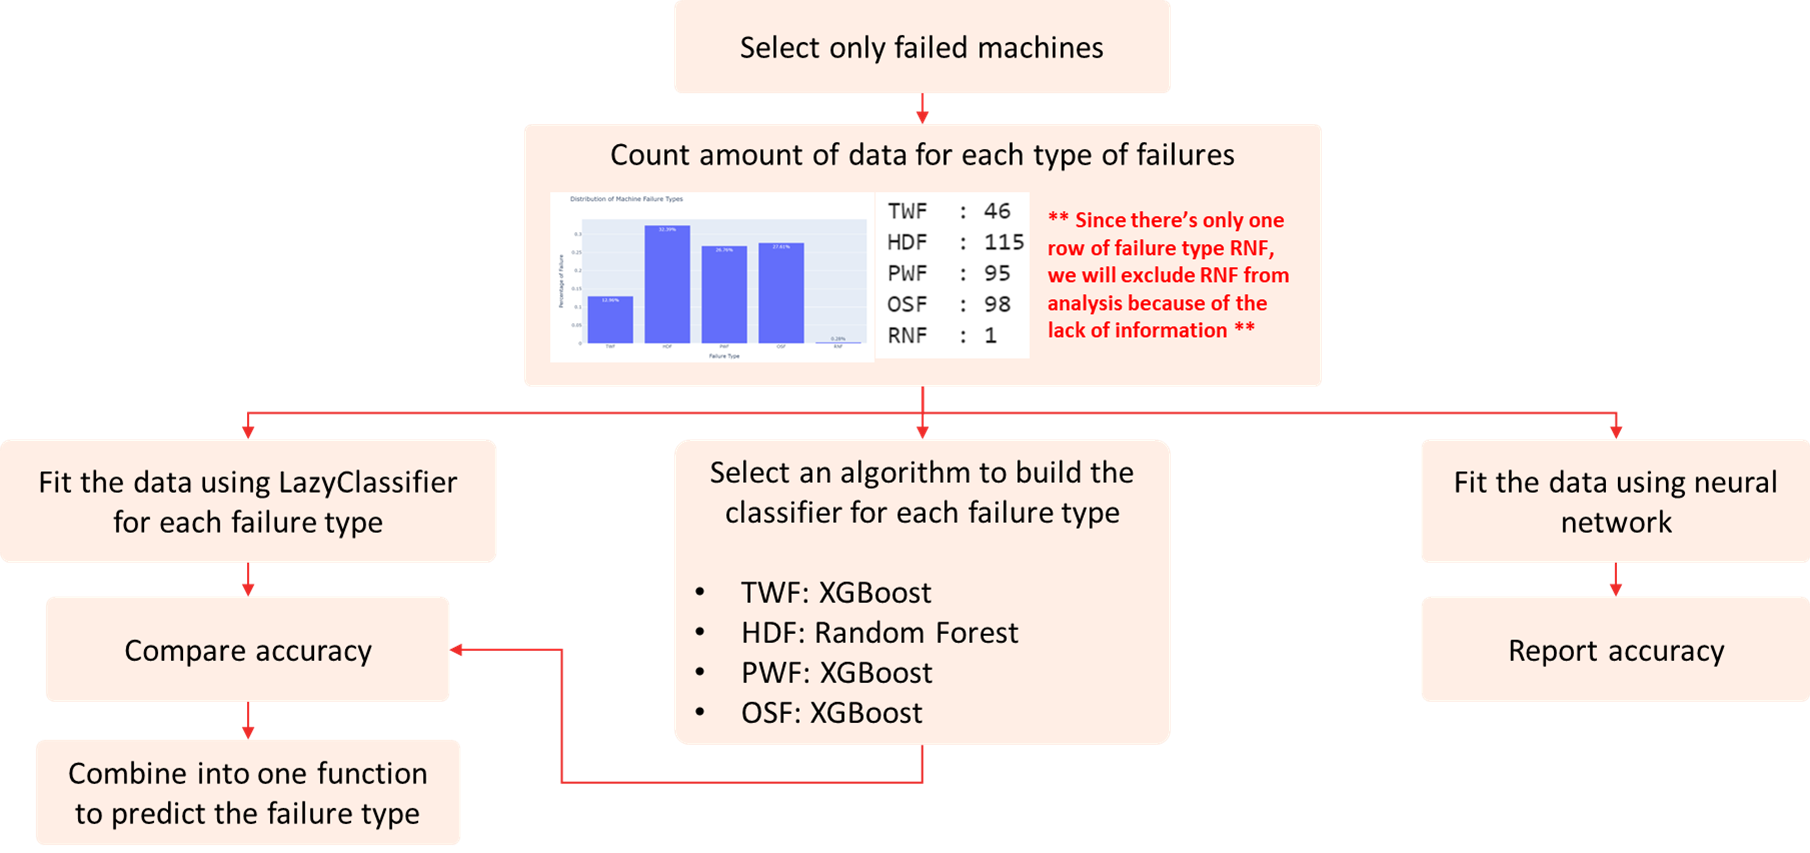

For the second objective, we will filter the dataset with all the machine failure instances and try to classify the type of machine failure that transpired. For this dataset, we have five different types of machine failures: TWF, HDF, PWF, OSF, and RNF. For each type of machine failure, we will run the following algorithms to classify the corresponding type of machine failure:
- Lazy Classifier to help build and determine the performance of basic models
- The chosen machine learning algorithm 
- Neural Network

After developing models for each type of failure and getting the desired accuracy, we will compare them and choose the best model, then implement a function that takes in a row data of the machine and outputs the type of failure that occurred.

***

# **4. Result**

In [ ]:
# Install lazypredict
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Import all necessary library
import sklearn
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import RocCurveDisplay
import datetime as dt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neural_network import MLPClassifier
#import pydotplus
import graphviz
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from tqdm import tqdm, trange
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import lazypredict
from lazypredict.Supervised import LazyClassifier
import xgboost as xgb
import plotly.express as px
from xgboost import XGBClassifier, plot_tree
import altair as alt
import sklearn.cluster as skc
import scipy.spatial.distance as spd

### **4.1 Classify whether the machine will fail or not**

### **Preprocessing**

Since this dataset is from kaggle, the dataset is somewhat processed prior to uploading. Although the dataset is clean, we still have to process it a little further to make sure that the data is Machine Learning ready. First, we loaded the columns from the original dataframe that are in the x variable. Afterwards, we used LabeEncoder from scikit-learn to encode the categorical variable called "Type". The Label Encoder changed [H,L,M] to [0,1,2] by transforming the original variables. Afterwards, we loaded the y_variable with machine failure column. 

In [ ]:
# Select only the predict variables
q1_x = df[["Type", "air_temp", "pro_temp", "R_speed", "Torque", "Tool_wear"]]
q1_x.head(4)

,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7


In [ ]:
# Encode the Type column
le = preprocessing.LabelEncoder()
le.fit(q1_x.Type)
print(le.classes_)
q1_x.Type = le.transform(q1_x.Type)
q1_x.head()

['H' 'L' 'M']


<ipython-input-23-46594838ed85>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_x.Type = le.transform(q1_x.Type)


,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9


In [ ]:
# Select only the response variables
q1_y = df["Machine_failure"]
q1_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine_failure, dtype: int64

### **Training and Testing the Model**

For training and testing, we used the usual 0.8 train, 0.2 test ratio. We split the data in X_train, X_test, y_train, y_test using 42 for random_state so that we did not get different accuracy on different runs. 

In [ ]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=.2, random_state =42)

### ***Lazy Classifier***

We will be checking with LazyClassifier to see which models are suitable for this dataset. It runs through all the classification models from scikit-learn and returns accuracy, balanaced accuracy, Recall, f1, and run time. Naturally, we fitted the data using LazyClassifier to find out which models are most suitable to classify whether the machine will fail or not. The list is order by the balanced accuracy, in which the top 4 models, SVC, and KNN are used for evaluation and comparing which model performs the best.


In [ ]:
# Instantiate the Lazy Classifier model
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [ ]:
# Fit the model
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|███████████████████████████████████████████| 28/28 [00:06<00:00,  4.00it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.98               0.84     0.84      0.98   
XGBClassifier                      0.98               0.83     0.83      0.98   
BaggingClassifier                  0.99               0.83     0.83      0.99   
RandomForestClassifier             0.98               0.79     0.79      0.98   
NearestCentroid                    0.72               0.77     0.77      0.81   
AdaBoostClassifier                 0.98               0.74     0.74      0.98   
LabelSpreading                     0.98               0.73     0.73      0.97   
LabelPropagation                   0.97               0.73     0.73      0.97   
ExtraTreeClassifier                0.97               0.73     0.73      0.97   
PassiveAggressiveClassifier        0.96               0.72     0.72      0.96   
ExtraTreesClassifier        

Since decision tree algorithm has the highest balanced accuracy, we decided to implement that and also tested a bagging classifier. Afterwards, we tested SVC and KNN. Although they have lower balanced accuracy compared to other methods, we were taught how to optimize those algorithms in class so, we decided to try our hand at those algorithms.

### ***Decision Tree Classifier and Bagging Classifier***

100%|██████████| 200/200 [00:25<00:00,  7.79it/s]

Optimal Degree is 10


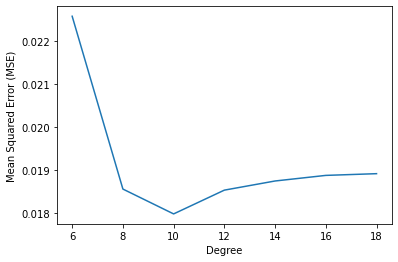

In [ ]:
# Number of depth optimization
ks = np.arange(6,20, 2)
n_repeats = 200
accs_val = np.zeros((n_repeats, len(ks)))
criteria = "gini" 
max_depth = 6 
min_sample_leaf = 4

for i in tqdm(range(n_repeats)):
    X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=.2)
    for j, k in enumerate(ks):
        clf_gini = DecisionTreeClassifier(criterion=criteria, random_state=100,
                                max_depth=k, min_samples_leaf=min_sample_leaf)
        clf_gini.fit(X_train, y_train)
        accs_val[i, j] = mean_squared_error(y_test, clf_gini.predict(X_test))
        
# Find optimal degree
scores = accs_val.mean(axis=0)
k = ks[np.argmin(scores)]
print("Optimal Degree is",k)

plt.plot(ks, scores)
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Degree')
plt.show()

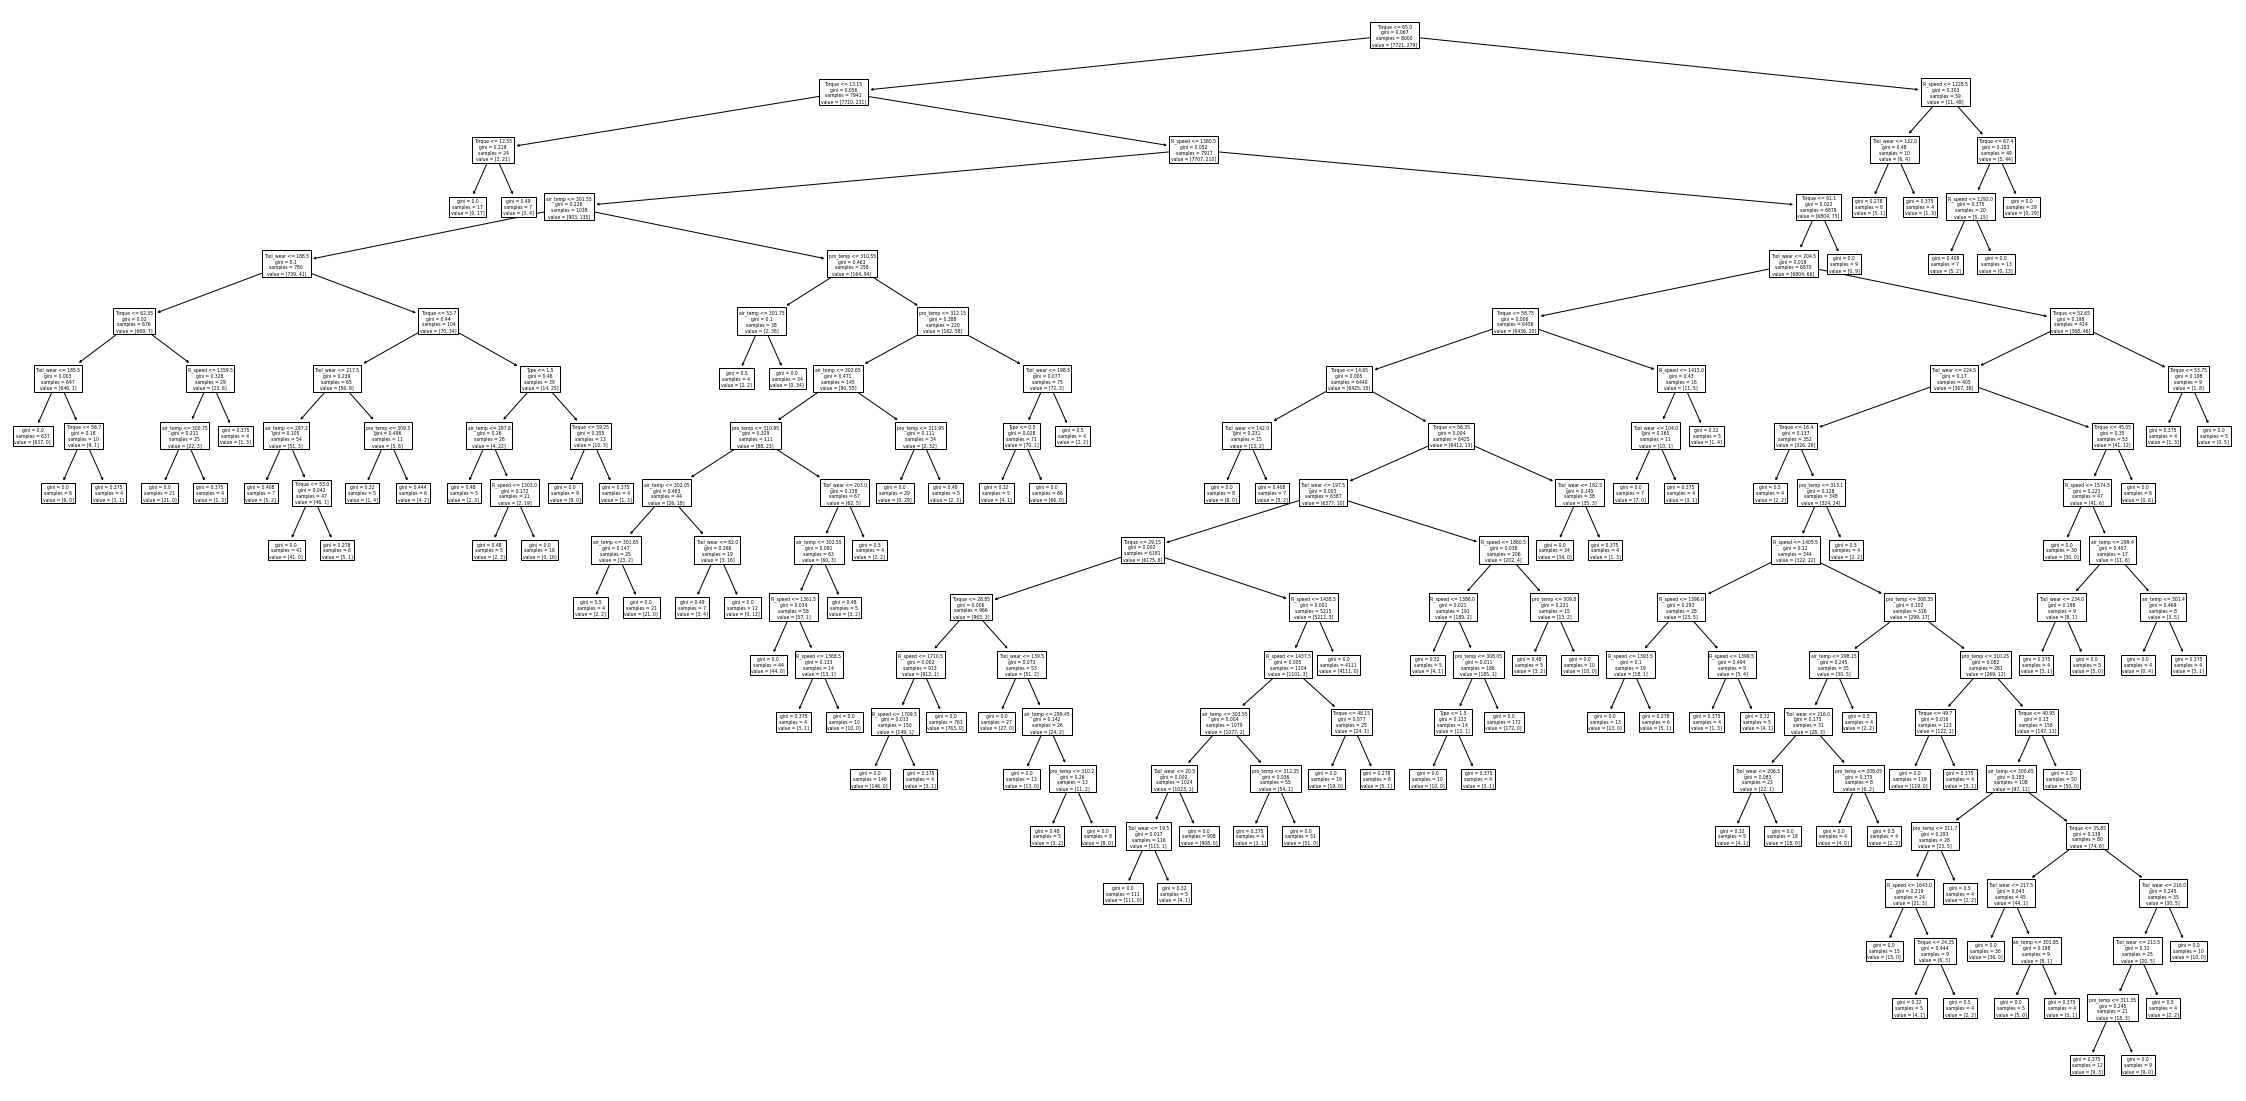

In [ ]:
# Display
plt.figure(figsize=(40,20))
plot_tree(clf_gini, feature_names = X_train.columns)
plt.show()

In [ ]:
# To build a tree, we could use 'gini' or 'entropy' as split criterion at each node. 
# Here we use an example use 'gini' and with a few other hyperparameters.
criteria = "gini" 
max_depth = 10
min_sample_leaf = 4
clf_gini = DecisionTreeClassifier(criterion=criteria, random_state=100,
                                max_depth=max_depth, min_samples_leaf=min_sample_leaf)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
print("training score :",clf_gini.score(X_train, y_train))

training score : 0.99125


array([[1921,   18],
       [  19,   42]], dtype=int64)

In [ ]:
# Compute performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print("confusion matrix = " + cm)
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.9815
precision = 0.8451030927835051
recall = 0.8396207272635041
f1 = 0.8423381675860055


In [ ]:
# Here we use 'entropy' as split criterion at each node. 
criteria = "entropy" 
max_depth = 10
min_sample_leaf = 4
clf_entropy = DecisionTreeClassifier(criterion=criteria, random_state=100,
                                max_depth=max_depth, min_samples_leaf=min_sample_leaf)
clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)
print("training score :",clf_entropy.score(X_train, y_train))

training score : 0.99125


array([[1920,   19],
       [  20,   41]], dtype=int64)

In [ ]:
# Compute performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print("confusion matrix = " + cm)
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.9805
precision = 0.836512027491409
recall = 0.8311661410732252
f1 = 0.8338159063744384


In [ ]:
############ what's this cell for ############
max_depth = 3

X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=.2)
regr_tree = DecisionTreeRegressor(max_depth=max_depth)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

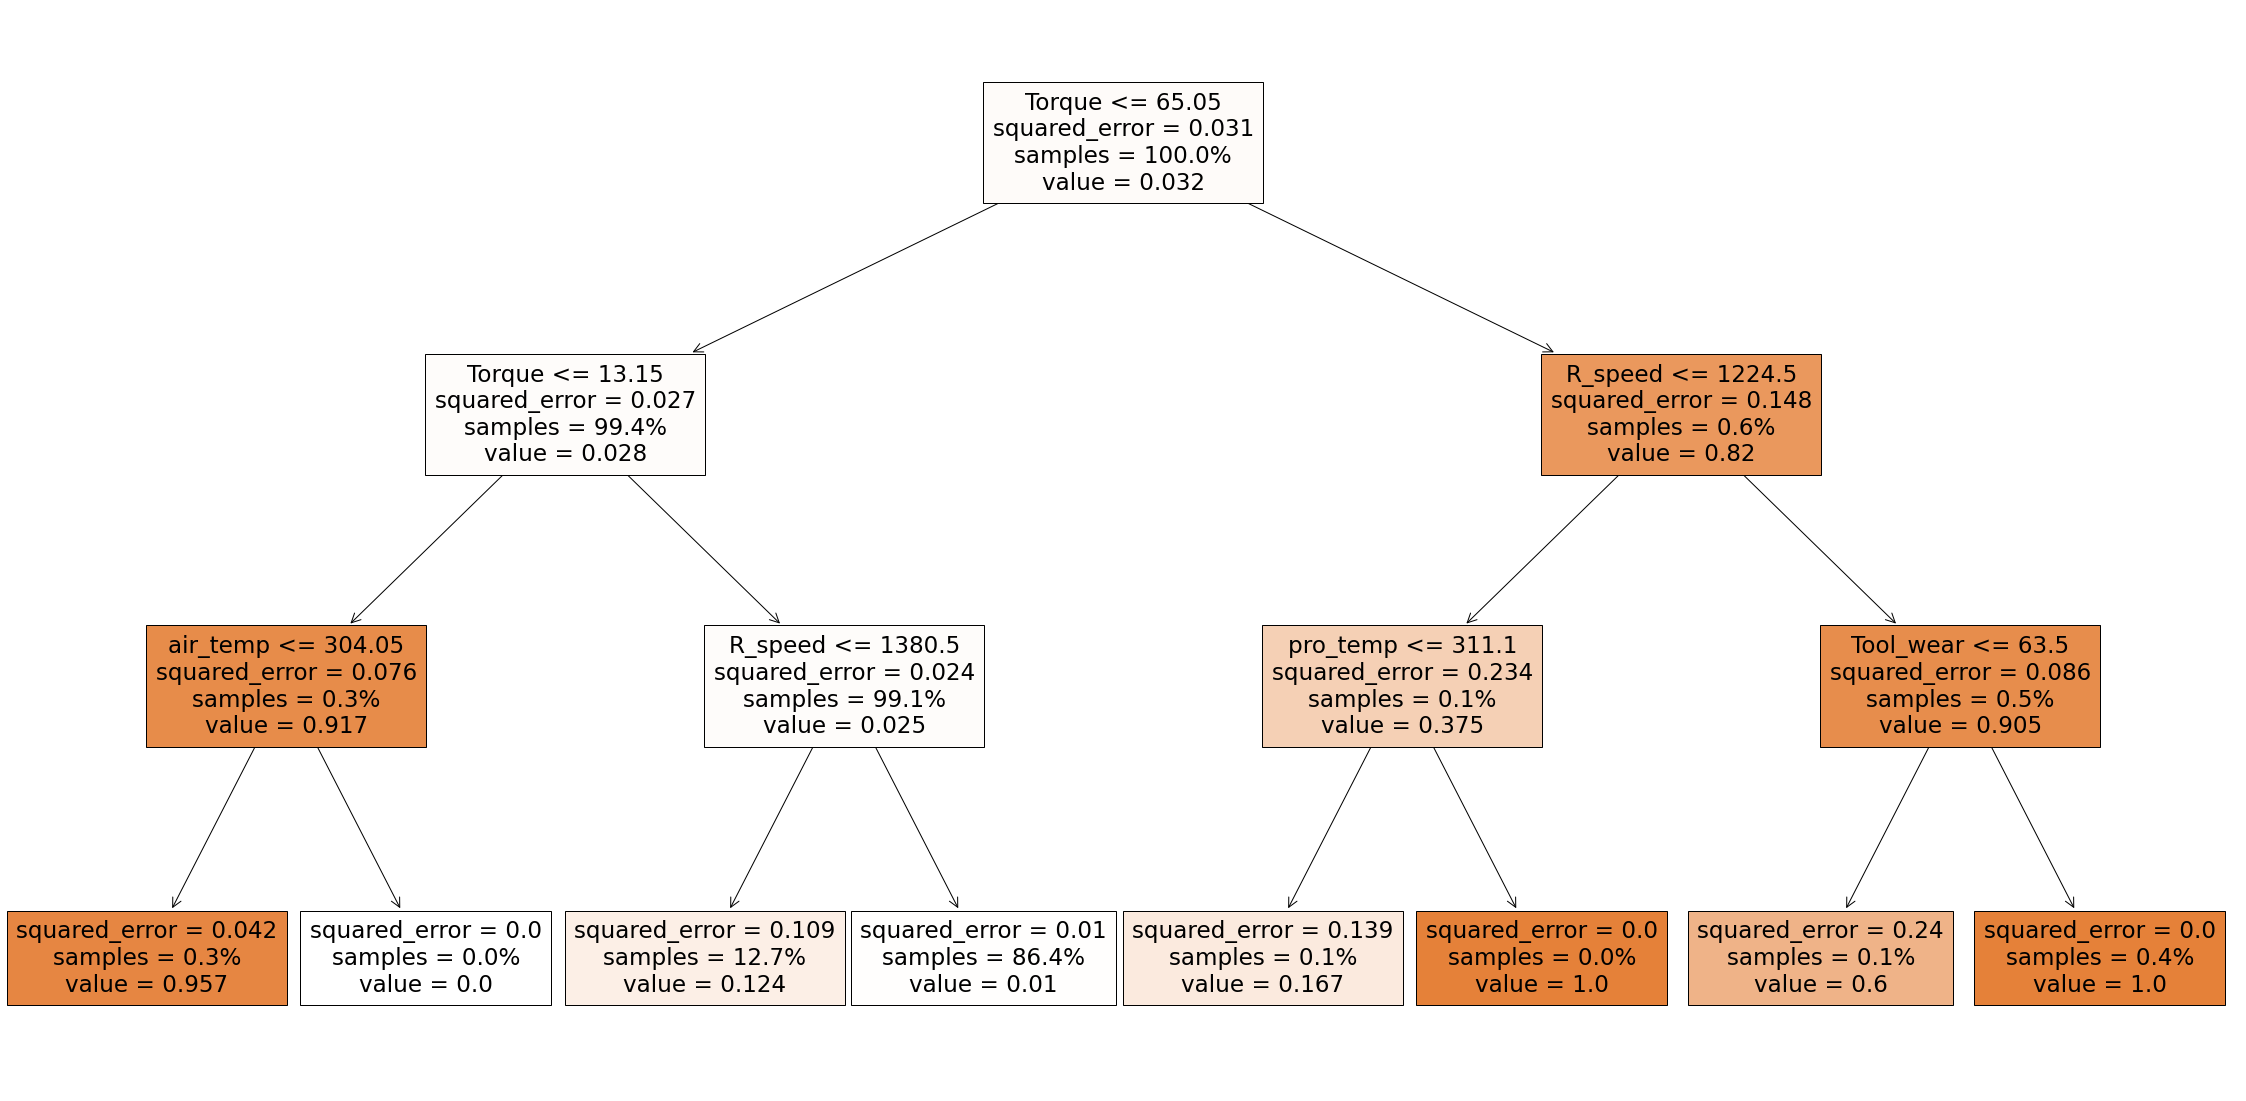

In [ ]:
# Display
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
plot_tree(regr_tree, filled=True, feature_names = X_train.columns, proportion = True)
plt.show()

In [ ]:
#### Bagging Classifier ####
# we reused the previous train and test sets.
all_features = X_train.shape[1]
regr_bagging = RandomForestRegressor(max_features=all_features)
regr_bagging.fit(X_train, y_train)

RandomForestRegressor(max_features=6)

In [ ]:
y_pred = regr_bagging.predict(X_test)
print("Mean squared error using bagging classifier:", mean_squared_error(y_test, y_pred))

Mean squared error using bagging classifier: 0.012913699999999998


In [ ]:
# Compute performance
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='macro')
recall = recall_score(y_test, y_pred.round(), average='macro')
f1 = f1_score(y_test, y_pred.round(), average='macro')
cm = confusion_matrix(y_test, y_pred.round())
print("confusion matrix = " + cm)
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.986
precision = 0.9068904113723477
recall = 0.8419415111727356
f1 = 0.8713991769547325


array([[1930,    9],
       [  19,   42]], dtype=int64)

### ***Decision Tree by Random Forests***

In [ ]:
# Here we'll use max_features = 2 (close to square root of all features as a rule of thumb)
n_estimators=300
regr_rf = RandomForestRegressor(n_estimators=n_estimators, max_features=2)
regr_rf.fit(X_train, y_train)

y_pred = regr_rf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.013051627777777778


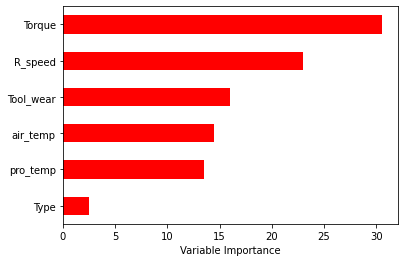

In [ ]:
# RF provides multiple ways to interpret the model. One way is to see the importance of each feature.
Importance = pd.DataFrame({'Importance':regr_rf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
estimatorAccuracy=[]
for curEstimator in range(n_estimators):
    estimatorAccuracy.append([curEstimator,accuracy_score(q1_y, regr_rf.estimators_[curEstimator].predict(q1_x))])

estimatorAccuracy=pd.DataFrame(estimatorAccuracy,columns=['estimatorNumber','Accuracy'])
estimatorAccuracy.sort_values(inplace=True,by='Accuracy',ascending=False)

bestDecisionTree= regr_rf.estimators_[estimatorAccuracy.head(1)['estimatorNumber'].values[0]]
bestDecisionTree

DecisionTreeRegressor(max_features=2, random_state=1342048244)

In [ ]:
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='macro')
recall = recall_score(y_test, y_pred.round(), average='macro')
f1 = f1_score(y_test, y_pred.round(), average='macro')
cm = confusion_matrix(y_test, y_pred.round())

print("confusion matrix = " + cm)
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.9845
precision = 0.9221873631985991
recall = 0.7935347779402937
f1 = 0.8455371445797241


array([[1933,    6],
       [  25,   36]], dtype=int64)

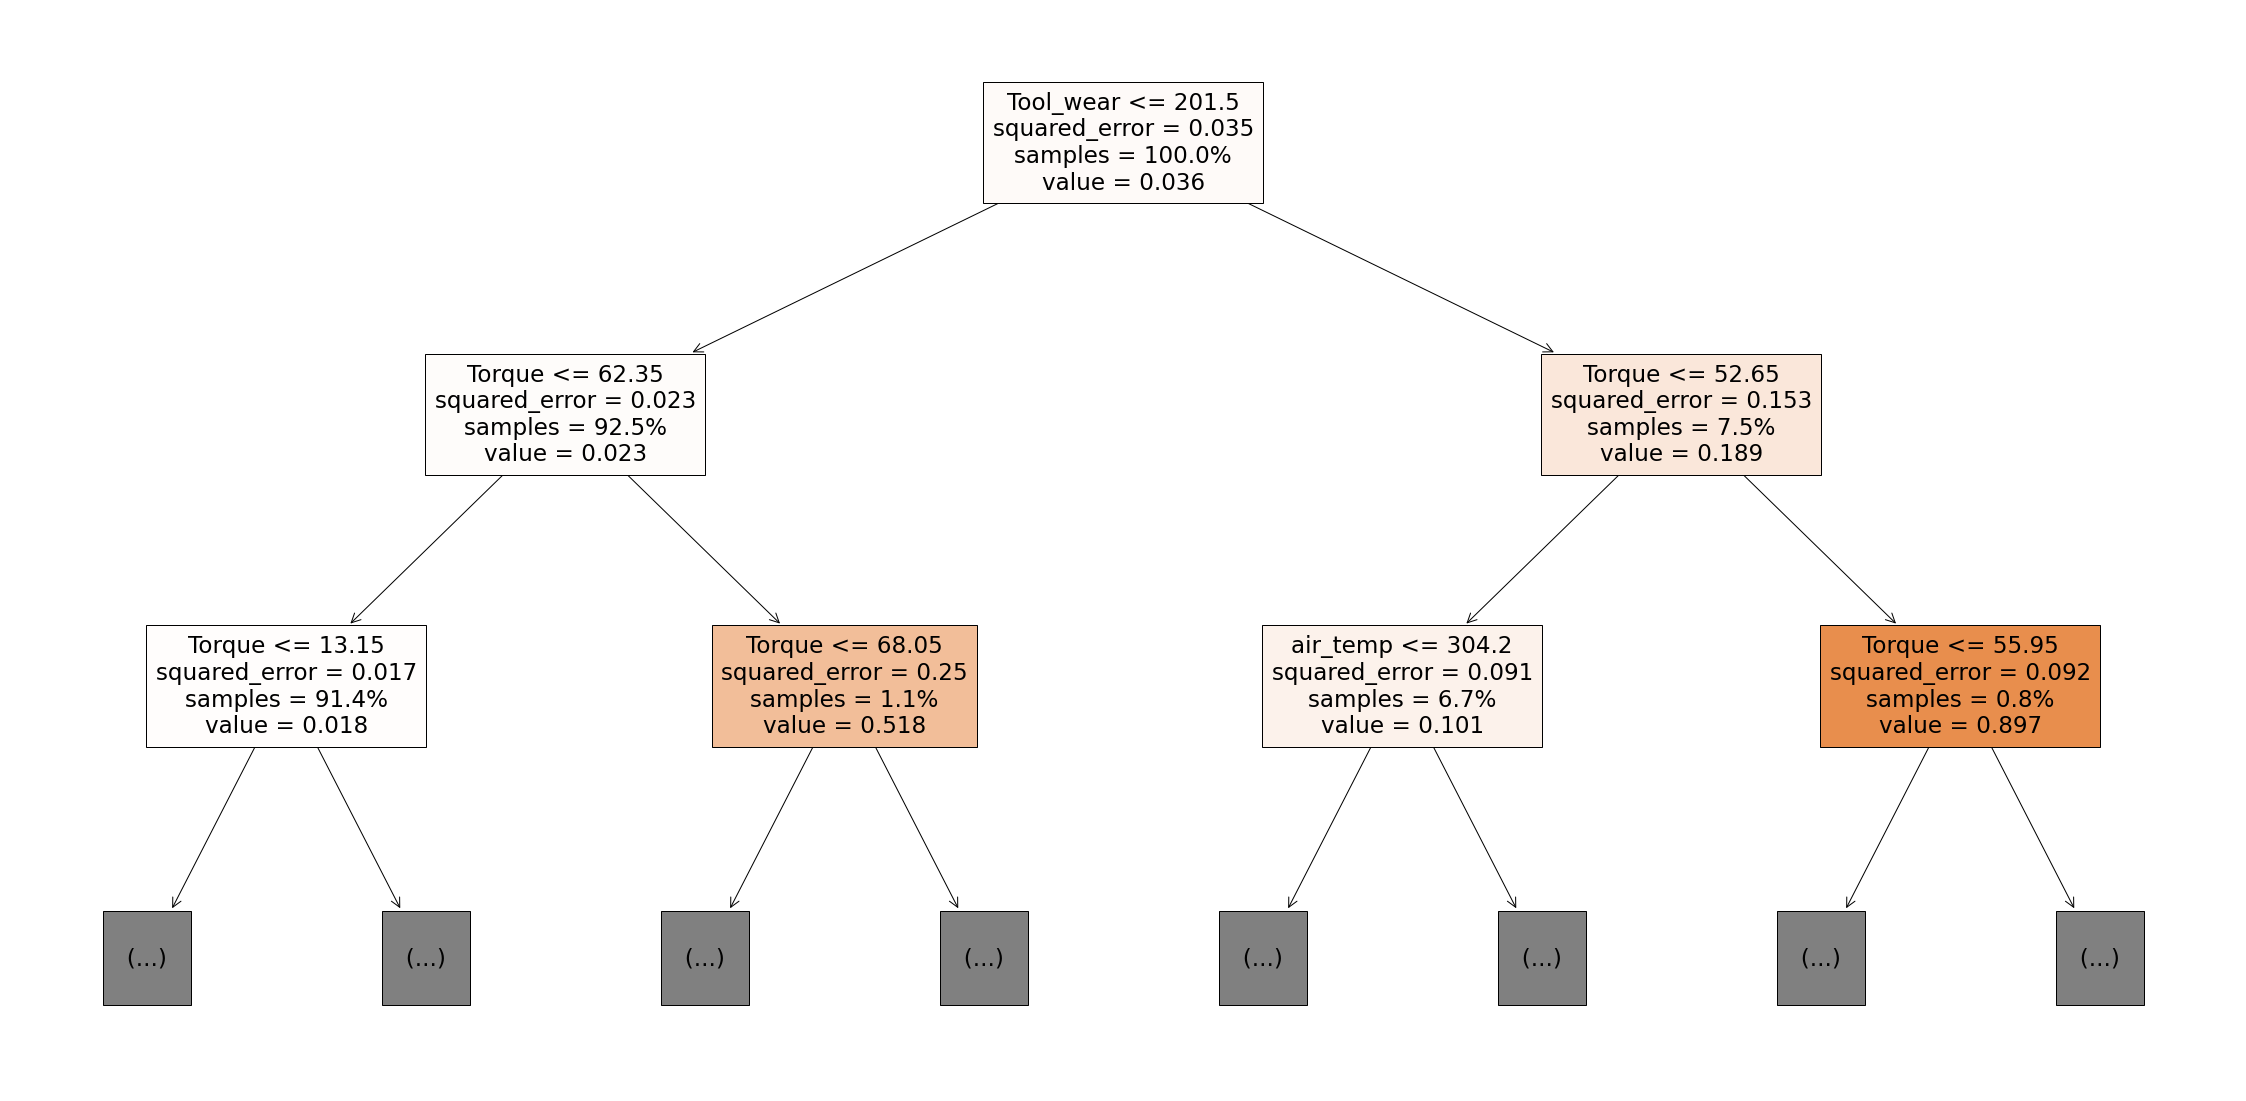

In [ ]:
# Display
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
plot_tree(bestDecisionTree, filled=True, feature_names = X_train.columns, max_depth=2, proportion = True)
plt.show()

### ***Decision Tree by XGBoosting***

In [ ]:
# Fit the Model
XGB_boost = XGBClassifier(n_estimators=500, learning_rate=0.02, max_depth=6)
XGB_boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

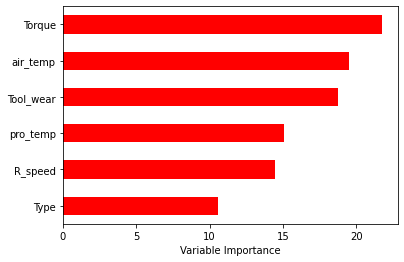

In [ ]:
feature_importance = XGB_boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X_train.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
y_pred = XGB_boost.predict(X_test)
print(mean_squared_error(y_test,y_pred))

0.0135


In [ ]:
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='macro')
recall = recall_score(y_test, y_pred.round(), average='macro')
f1 = f1_score(y_test, y_pred.round(), average='macro')
cm = confusion_matrix(y_test, y_pred.round())

print("confusion matrix = " + cm)
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.9865
precision = 0.908841415258253
recall = 0.850138232484211
f1 = 0.8770578579380781


array([[1930,    9],
       [  18,   43]], dtype=int64)

In [ ]:
print('Best iteration for XGB classifier is {}'.format(XGB_boost.best_iteration))
best_n_estimators = XGB_boost.best_iteration

best_regressor = XGBClassifier(n_estimators=best_n_estimators, learning_rate=0.02, max_depth=3)
best_regressor.fit(X_train, y_train)

Best iteration for XGB classifier is 499


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=499, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

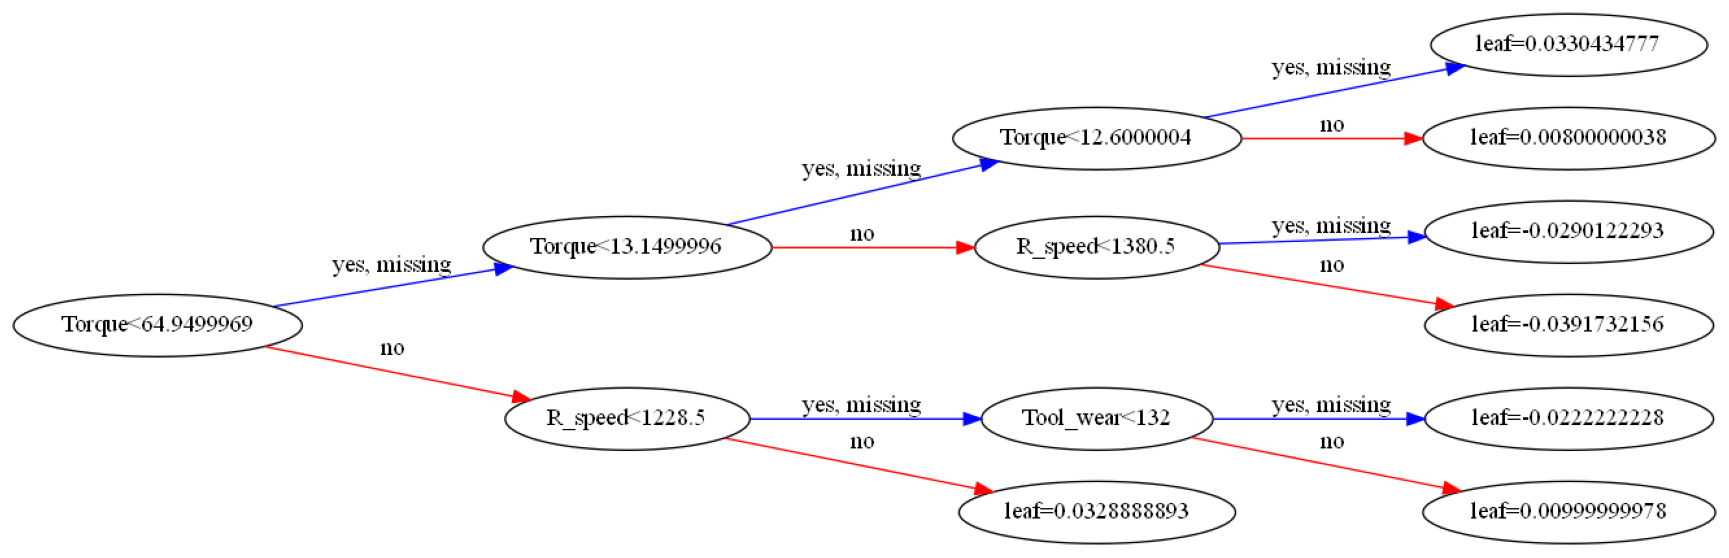

In [ ]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
import matplotlib

##set up the parameters
plot_tree(best_regressor, rankdir='LR')
fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(100, 100)
plt.show()

### ***Decision Tree by Gradient Boosting***

In [ ]:
regr_boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.02, max_depth=6)
regr_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=500)

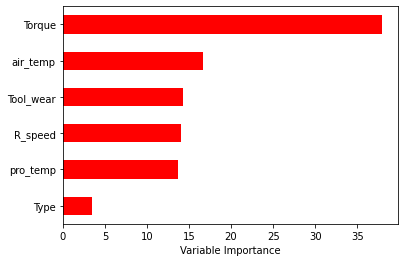

In [ ]:
# Let us check the feature importance and MSE.
feature_importance = regr_boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X_train.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
y_pred = regr_boost.predict(X_test)
print(mean_squared_error(y_test,y_pred))

0.013049823395029471


In [ ]:
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='macro')
recall = recall_score(y_test, y_pred.round(), average='macro')
f1 = f1_score(y_test, y_pred.round(), average='macro')
cm = confusion_matrix(y_test, y_pred.round())

print("confusion matrix = " + cm)
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.985
precision = 0.8968299479874043
recall = 0.8334869249824568
f1 = 0.8622134038800706


array([[1929,   10],
       [  20,   41]], dtype=int64)

In [ ]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regr_boost.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
print(best_n_estimators)

best_regressor = GradientBoostingRegressor(n_estimators=best_n_estimators, learning_rate=0.02, max_depth=6)
best_regressor.fit(X_train, y_train)

243


GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=243)

In [ ]:
best_regressor[best_n_estimators-1,0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                      random_state=RandomState(MT19937) at 0x14115D77A40)

In [ ]:
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='macro')
recall = recall_score(y_test, y_pred.round(), average='macro')
f1 = f1_score(y_test, y_pred.round(), average='macro')
cm = confusion_matrix(y_test, y_pred.round())

print("confusion matrix = " + cm)
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.985
precision = 0.8968299479874043
recall = 0.8334869249824568
f1 = 0.8622134038800706


array([[1929,   10],
       [  20,   41]], dtype=int64)

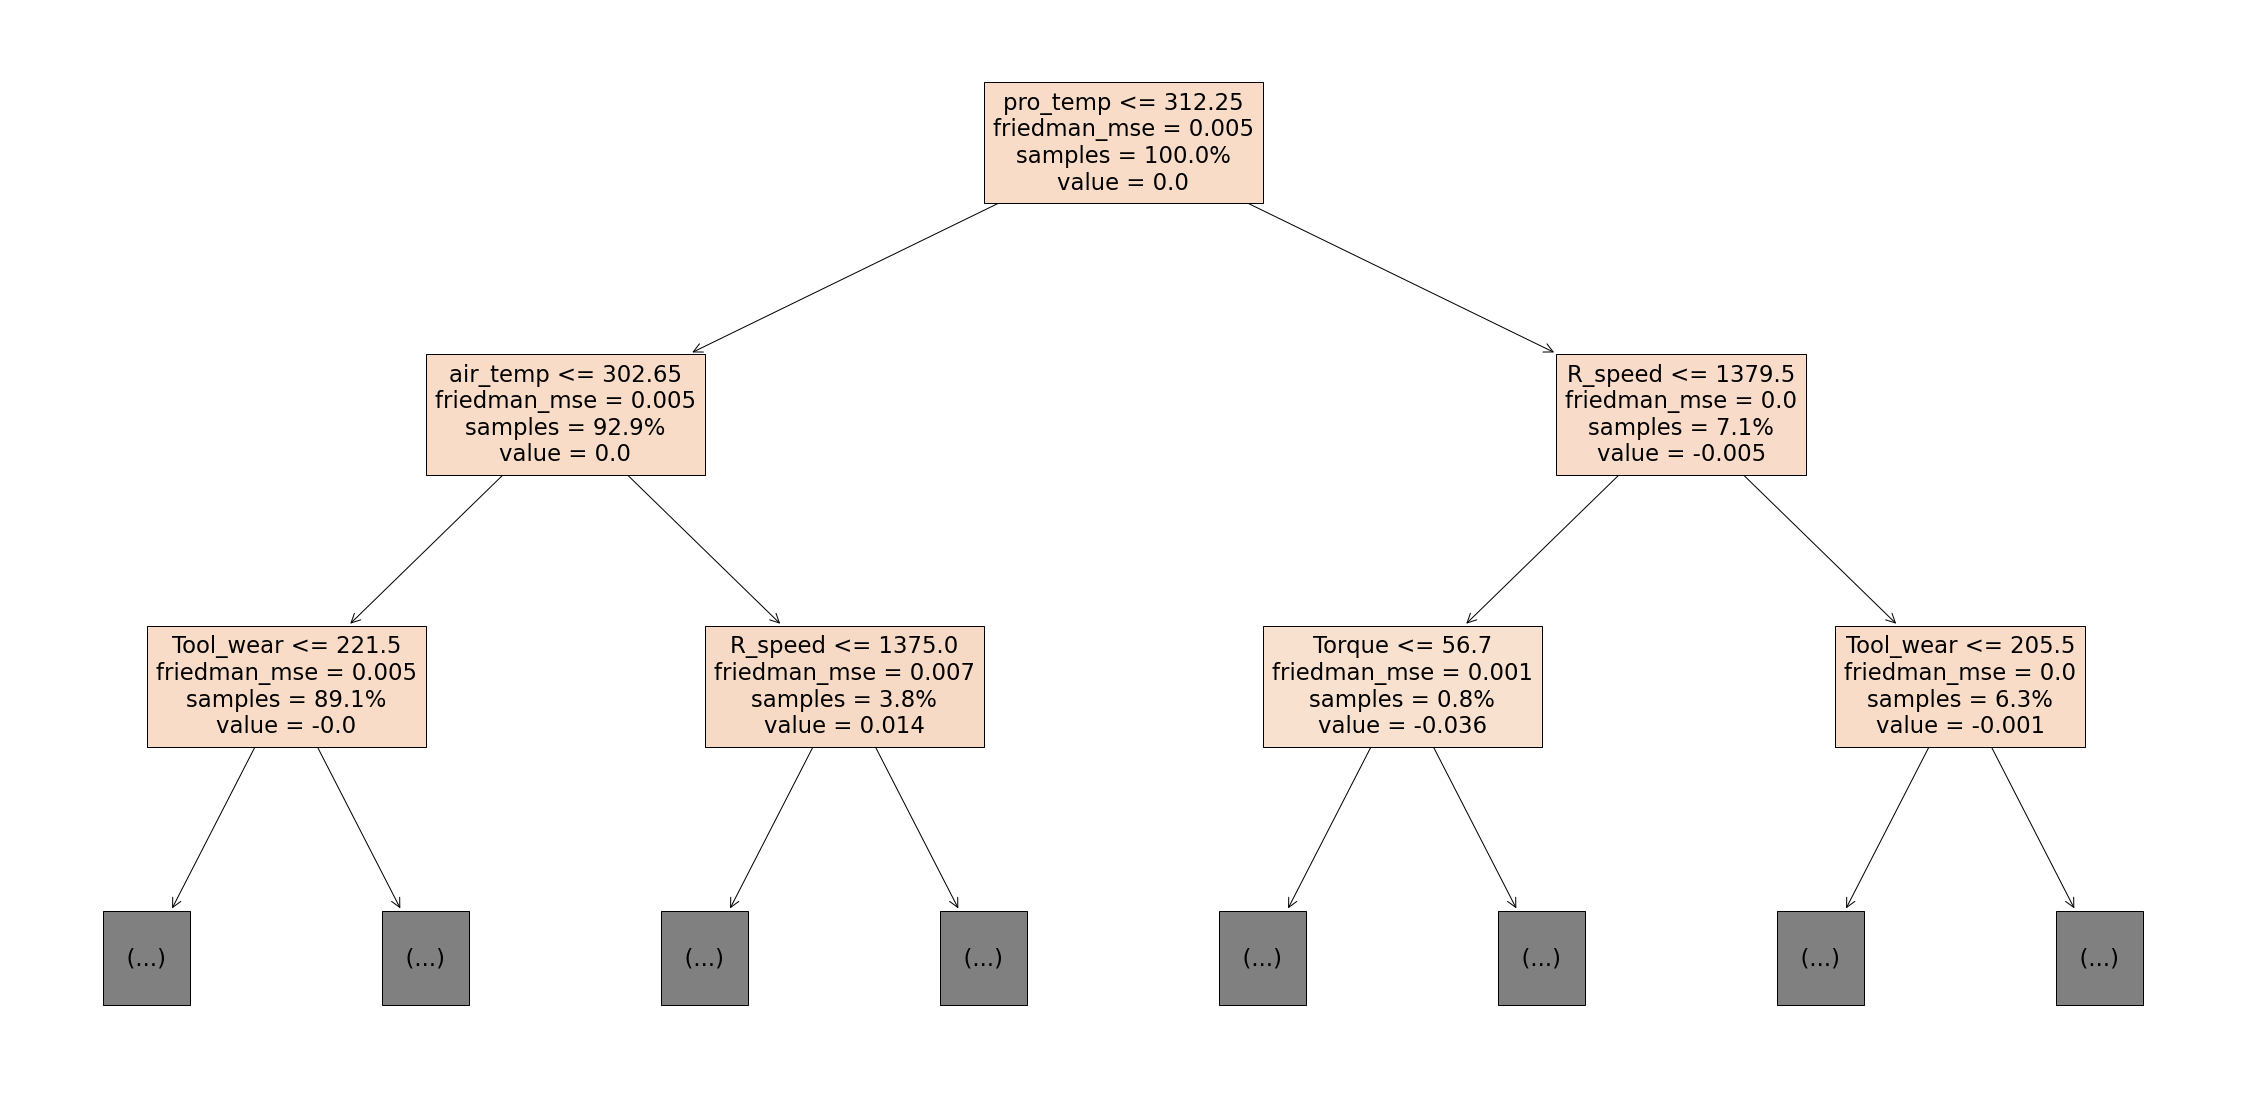

In [ ]:
# Display
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
plot_tree(best_regressor[best_n_estimators-1,0], filled=True, feature_names = X_train.columns, max_depth=2, proportion = True)
plt.show()

### ***Support Vector Classification (SVC, with PCA)***

In [ ]:
# ks = np.arange(6,20, 2)
n_repeats = 200
# accs_val = np.zeros((n_repeats, len(ks)))
kernels =['poly', 'sigmoid', 'linear', 'rbf']
counter = {}
#initializing kernels in dict
for i in kernels: 
    counter[i] = 0
    
for i in tqdm(range(n_repeats)):
    X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=.2)
    tmplist = []
    tmpdict = {}
    for j, k in enumerate(kernels):
        svm_pipeline = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=2)),
                                 ('svm', SVC(kernel=k, C=1.0, random_state=42))])
        # Fit the pipeline to the training data
        svm_pipeline.fit(X_train, y_train)
        tmplist.append(mean_squared_error(y_test, svm_pipeline.predict(X_test)))
        tmpdict[k] = mean_squared_error(y_test, svm_pipeline.predict(X_test))
    for kernel, value in tmpdict.items():
        if value <= min(tmplist): 
            counter[kernel] +=1

100%|██████████| 200/200 [08:38<00:00,  2.59s/it]


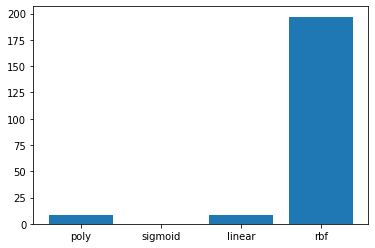

In [ ]:
import matplotlib.pyplot as plt

names = list(counter.keys())
values = list(counter.values())

plt.bar(range(len(counter)), values, tick_label=names)
plt.show()

In [ ]:
# For PCA, First Need to Scale the Data.  
scaler1 = StandardScaler()
scaler1.fit(q1_x)
feature_scaled = scaler1.transform(q1_x)

# Now Apply PCA

pca1 = PCA(n_components=4)
pca1.fit(feature_scaled)
feature_scaled_pca = pca1.transform(feature_scaled)
print("shape of the scaled and 'PCA'ed features: ", np.shape(feature_scaled_pca))

shape of the scaled and 'PCA'ed features:  (10000, 4)


In [ ]:
# Let's see the variance to see out of the 
# 4 components which are contributing most 

feat_var = np.var(feature_scaled_pca, axis=0)
feat_var_rat = feat_var/(np.sum(feat_var))

print ("Variance Ratio of the 4 Principal Components Ananlysis: ", feat_var_rat)

Variance Ratio of the 4 Principal Components Ananlysis:  [0.3322636  0.32015451 0.1745565  0.1730254 ]


In [ ]:
components = pd.DataFrame(pca1.components_)
components.columns = q1_x.columns
components

,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear
0,0.01,0.51,0.51,0.49,-0.49,0.02
1,-0.02,-0.49,-0.49,0.51,-0.51,-0.01
2,-0.70,-0.00,0.00,-0.01,0.00,0.71
3,-0.71,0.02,0.03,-0.00,0.00,-0.70


In [ ]:
explained_variance = pd.DataFrame({'Explained Variance Ratio':pca1.explained_variance_ratio_,
             'Principle Component':['PC'+ str(i+1) for i in range(pca1.n_components_)]})

fig = px.bar(explained_variance, x='Principle Component', y='Explained Variance Ratio', text_auto='.4f')
fig.show()

<class 'list'>


100%|██████████| 6/6 [00:00<00:00, 1200.09it/s]


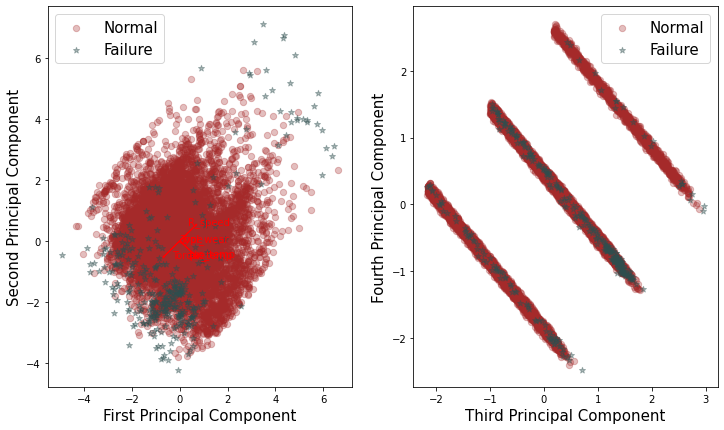

In [ ]:
#print (type(cancer.target))
q1_y_list = q1_y.tolist()
print (type(q1_y_list))
#print (cancer_target_list)
#print (type(yl))
feature_scaled_pca_X0 = feature_scaled_pca[:, 0]
feature_scaled_pca_X1 = feature_scaled_pca[:, 1]
feature_scaled_pca_X2 = feature_scaled_pca[:, 2]
feature_scaled_pca_X3 = feature_scaled_pca[:, 3]

vector1 = pca1.components_[0]
vector2 = pca1.components_[1]
vector3 = pca1.components_[2]
vector4 = pca1.components_[3]

labels = q1_y_list
colordict = {0:'brown', 1:'darkslategray'}
piclabel = {0:'Normal', 1:'Failure'}
markers = {0:'o', 1:'*'}
alphas = {0:0.3, 1:0.4}

fig = plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
for l in np.unique(labels):
    ix = np.where(labels==l)
    plt.scatter(feature_scaled_pca_X0[ix], feature_scaled_pca_X1[ix], c=colordict[l], 
               label=piclabel[l], s=40, marker=markers[l], alpha=alphas[l])
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)

plt.legend(fontsize=15)

for i in tqdm(range(len(vector1))):
    plt.arrow(0, 0, vector1[i]*max(feature_scaled[0]), vector2[i]*max(q1_y_list),
              color='r', width=0.005, head_width=0.05)
    plt.text(vector1[i]*max(feature_scaled[1])*1.1, vector2[i]*max(q1_y_list)*1.1,
             list(q1_x.columns.values)[i], color='r')

plt.subplot(1,2,2)
for l1 in np.unique(labels):
    ix1 = np.where(labels==l1)
    plt.scatter(feature_scaled_pca_X2[ix1], feature_scaled_pca_X3[ix1], c=colordict[l1], 
               label=piclabel[l1], s=40, marker=markers[l1], alpha=alphas[l1])
plt.xlabel("Third Principal Component", fontsize=15)
plt.ylabel("Fourth Principal Component", fontsize=15)

plt.legend(fontsize=15)

plt.savefig('Cancer_labels_PCAs.png', dpi=200)
plt.show()

In [ ]:
# Create a pipeline

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svm', SVC(kernel='rbf', C=1.0, random_state=42))
])
# Fit the pipeline to the training data
svm_pipeline.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = svm_pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.963
precision = 0.9261119482113958
recall = 0.5491221636783561
f1 = 0.5794259732878658


### ***K-Nearest Neighbors (KNN)***

100%|█████████████████████████████████████████| 200/200 [04:48<00:00,  1.44s/it]

9


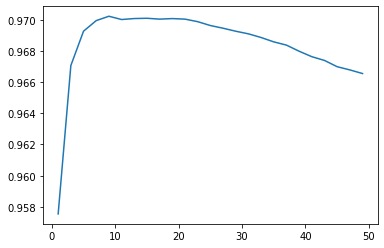

In [ ]:
ks = np.arange(1, 50, 2)

n_repeats = 200
accs_val = np.zeros((n_repeats, len(ks)))

for i in tqdm(range(n_repeats)):
    X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=.2)
    for j, k in enumerate(ks):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        accs_val[i, j] = accuracy_score(y_test, model.predict(X_test))

scores = accs_val.mean(axis=0)
k = ks[np.argmax(scores)]
print(k)

plt.plot(ks, scores)

In [ ]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1937,    2],
       [  54,    7]], dtype=int64)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.972
precision = 0.8753278642781406
recall = 0.5568613194227209
f1 = 0.5928753180661578


In [ ]:
#knn_xy = q1_x.head(5000).append(q1_y.head(5000))
knn_xy = pd.concat([q1_x.head(5000), q1_y.head(5000)], axis=1)
knn_xy

,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear,Machine_failure
0,2,298.10,308.60,1551,42.80,0,0
1,1,298.20,308.70,1408,46.30,3,0
2,1,298.10,308.50,1498,49.40,5,0
3,1,298.20,308.60,1433,39.50,7,0
4,1,298.20,308.70,1408,40.00,9,0
...,...,...,...,...,...,...,...
4995,1,303.60,312.60,1540,39.80,21,0
4996,2,303.60,312.80,1400,43.20,23,0
4997,2,303.60,312.80,2659,11.40,26,1
4998,2,303.60,312.80,1825,25.20,29,0


In [ ]:
points = alt.Chart(knn_xy).mark_point().encode(
  x='R_speed', y='Torque', color='Machine_failure'
)
text = alt.Chart(knn_xy).mark_text(dx=9).encode(
  x='R_speed', y='Torque', color='Machine_failure'
)
(points + text)

alt.LayerChart(...)

[130.83877587252903, 89.15476840605771, 65.08267106916104, 54.304343210324774, 43.42634148080681, 36.61007367061884, 32.87525687298929, 28.40973125750292, 25.011638466852123, 23.02502190019945]


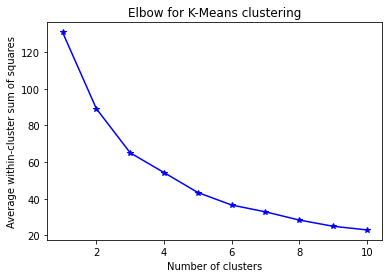

In [ ]:
X = machine_features  # Using the the dataset of Section 1
K1 = range(1,11)  # Apply kmeans 1 to 10
kmeans_models1 = [skc.KMeans(k).fit(X) for k in K1]
centroids1 = [m.cluster_centers_ for m in kmeans_models1]
D_k1 = [spd.cdist(X, cent, 'euclidean') for cent in centroids1]
cIdx1 = [np.argmin(D,axis=1) for D in D_k1]
dist1 = [np.min(D,axis=1) for D in D_k1]
avgWithinSS1 = [sum(d)/X.shape[0] for d in dist1]
print(avgWithinSS1)

# plot elbow curve
plt.plot(K1, avgWithinSS1, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('Elbow for K-Means clustering');

In [ ]:
machine_features = knn_xy[["R_speed","Torque"]]
kmeans_model = skc.KMeans(n_clusters=9,)
kmeans_model.fit(machine_features)
centroids = kmeans_model.cluster_centers_
#centroids1   these are the centers of the clusters
display(kmeans_model.labels_)
kmeans_centroids = pd.DataFrame(centroids)
kmeans_centroids

array([1, 2, 6, ..., 5, 4, 1])

,0,1
0,2187.79,16.98
1,1554.74,37.21
2,1407.69,47.75
3,1917.62,22.42
4,1757.63,27.34
5,2633.67,10.92
6,1477.45,42.62
7,1326.07,54.12
8,1642.99,32.43


In [ ]:
knn_xy['cluster_labels_kmeans'] = kmeans_model.labels_
points_plot_color = alt.Chart(knn_xy).mark_point().encode(
  x='R_speed', y='Torque', color='cluster_labels_kmeans:N'
)
centroid_plot = alt.Chart(kmeans_centroids).mark_point(shape='diamond',color='black').encode(
    x='0:Q', y='1:Q'
)
(points_plot_color + centroid_plot)

alt.LayerChart(...)

### ***Neural Network***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(1e-3), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+1)

# loss plot
plt.figure(figsize=(16, 10))
plt.subplot(211)
plt.plot(epochs, loss, label='traning loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(212)
plt.plot(epochs, acc, label='traning accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model.save("Q1.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("Q1.h5")

In [ ]:
# predict test data
test_pred = model.predict(X_test)
# to classes
test_pred_classes = (test_pred > 0.5).astype(int).flatten()


#print("Confusion Matrix")
cf_mat = confusion_matrix(y_test, test_pred_classes)

plt.figure(figsize=(5, 5))
plt.title(f"Confusion Matrix")
sns.heatmap(cf_mat / np.sum(cf_mat), annot=True, fmt=".2%", cmap="Blues")


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

# evaluation report
report = classification_report(y_test, y_pred_binary, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print(report_df)


### **4.2 Classify machine failure type** 

### **Preprocessing**

In [ ]:
q2_df = df[df.Machine_failure == 1]
q2_df.head()

q2_x = q2_df[["Type", "air_temp", "pro_temp", "R_speed", "Torque", "Tool_wear"]]
q2_x.head(4)

q2_y = q2_df[["TWF", "HDF", "PWF", "OSF", "RNF"]]
q2_y.head(4)

le = preprocessing.LabelEncoder()
le.fit(q2_x.Type)
q2_x.Type = le.transform(q2_x.Type)
q2_x.head()

q2_y_percentage = q2_y.sum().copy()
q2_y_percentage = pd.DataFrame(q2_y_percentage/sum(q2_y_percentage))
print(q2_y_percentage)

import plotly.graph_objects as go


display(q2_y.sum())
fig = px.bar(q2_y_percentage, 
             labels={'index':'Failure Type', 'value':'Percentage of Failure'},
             title = 'Distribution of Machine Failure Types', 
             text_auto='.2%')

fig.update_layout(showlegend=False)
fig.show()

In [ ]:
q2_y.columns

Index(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], dtype='object')

In [ ]:
for i in q2_y.columns: 
    amount= q2_y[q2_y[i] == 1]
    print(i,' :', len(amount))

TWF  : 46
HDF  : 115
PWF  : 95
OSF  : 98
RNF  : 1


Before running machine learning models, we conducted preliminary data analytics. The first thing we did was separate out the columns required for X and required for y. Afterwards, we did Label Encoding just like before to transform the categorical variable "Type". Then, we calculated the percentage of failure in y and plotted the result. For all the types of failures, we have a decent amount of failure to non-failure ratio except for RNF. As we clearly do not have enough data to classify RNF, we decided to omit RNF when running models.

### **TWF (Tool Wear Failure)**

In [ ]:
#TWF
X_train, X_test, y_train, y_test = train_test_split(q2_x, q2_y["TWF"], test_size=.2, random_state =42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|███████████████████████████████████████████| 28/28 [00:00<00:00, 36.97it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.99               0.97     0.97      0.99   
Perceptron                         0.90               0.91     0.91      0.90   
CalibratedClassifierCV             0.94               0.89     0.89      0.94   
SGDClassifier                      0.94               0.89     0.89      0.94   
LinearSVC                          0.94               0.89     0.89      0.94   
BaggingClassifier                  0.94               0.87     0.87      0.94   
DecisionTreeClassifier             0.94               0.87     0.87      0.94   
RandomForestClassifier             0.94               0.87     0.87      0.94   
ExtraTreesClassifier               0.94               0.87     0.87      0.94   
SVC                                0.93               0.86     0.86      0.92   
AdaBoostClassifier          

In [ ]:
def TWF_classifier(X_train, y_train,X_test):
    xgb_cl = xgb.XGBClassifier()
    xgb_cl.fit(X_train, y_train)
    y_pred = xgb_cl.predict(X_test)
    return y_pred
y_pred = TWF_classifier(X_train,y_train,X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  2],
       [ 1, 11]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.9558823529411765
precision = 0.913986013986014
recall = 0.9404761904761905
f1 = 0.9264864864864865


From the result of the LazyClassifier, XGboosting has the highest balanced accuracy so, we decided to implement that method. Our classifier function has XGboosting mounted inside it. When we evaluate our model, we got an accuracy of 0.956 with f1-score of 0.9264.

### **HDF (Heat Dissipation Failure)**

In [ ]:
#HDF
X_train, X_test, y_train, y_test = train_test_split(q2_x, q2_y["HDF"], test_size=.2, random_state =42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|███████████████████████████████████████████| 28/28 [00:00<00:00, 37.69it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.97               0.98     0.98      0.97   
XGBClassifier                      0.97               0.98     0.98      0.97   
BaggingClassifier                  0.99               0.98     0.98      0.99   
RandomForestClassifier             0.99               0.98     0.98      0.99   
LinearSVC                          0.96               0.97     0.97      0.96   
PassiveAggressiveClassifier        0.96               0.97     0.97      0.96   
DecisionTreeClassifier             0.97               0.97     0.97      0.97   
SGDClassifier                      0.94               0.96     0.96      0.94   
GaussianNB                         0.94               0.96     0.96      0.94   
QuadraticDiscriminantAnalysis      0.94               0.96     0.96      0.94   
CalibratedClassifierCV      

In [ ]:
# Create a Random Forest classifier and fit it to the training data
def HDF_classifier(X_train, y_train,X_test): 
    rfc = RandomForestClassifier(n_estimators=500, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    return y_pred
y_pred = HDF_classifier(X_train, y_train,X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  2],
       [ 2, 10]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.9411764705882353
precision = 0.8988095238095238
recall = 0.8988095238095238
f1 = 0.8988095238095238


For this section, we build a LazyClassifier then picked out a well-performing classifier then mount it into the function for classifier. From the result of the LazyClassifier, RandomForest has the highest accuracy at 0.99 so, we decided to implement that method. Our classifier function has RandomForest model mounted inside it. When we evaluate our model, we got an accuracy of 0.9411 with f1-score of 0.8988.

### **PWF (Power Failure)**

In [ ]:
#PWF
X_train, X_test, y_train, y_test = train_test_split(q2_x, q2_y["PWF"], test_size=.2, random_state =42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|███████████████████████████████████████████| 28/28 [00:00<00:00, 41.69it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.99               0.99     0.99      0.99   
AdaBoostClassifier                 0.97               0.95     0.95      0.97   
ExtraTreesClassifier               0.97               0.95     0.95      0.97   
QuadraticDiscriminantAnalysis      0.97               0.95     0.95      0.97   
BaggingClassifier                  0.97               0.95     0.95      0.97   
LinearSVC                          0.97               0.95     0.95      0.97   
XGBClassifier                      0.96               0.94     0.94      0.96   
KNeighborsClassifier               0.96               0.94     0.94      0.96   
DecisionTreeClassifier             0.96               0.94     0.94      0.96   
Perceptron                         0.94               0.93     0.93      0.94   
SVC                         

In [ ]:
def PWF_classifier(X_train, y_train,X_test):
    xgb_cl = xgb.XGBClassifier()
    xgb_cl.fit(X_train, y_train)
    y_pred = xgb_cl.predict(X_test)
    return y_pred
y_pred = PWF_classifier(X_train,y_train,X_test)

In [ ]:
# y_pred = PWF_classifier(X_train, y_train).predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.9558823529411765
precision = 0.913986013986014
recall = 0.9404761904761905
f1 = 0.9264864864864865


### **OSF (Overstrain Failure)**

In [ ]:
#OSF
X_train, X_test, y_train, y_test = train_test_split(q2_x, q2_y["OSF"], test_size=.2, random_state =42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|███████████████████████████████████████████| 28/28 [00:00<00:00, 37.70it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      1.00               1.00     1.00      1.00   
RandomForestClassifier             0.99               0.99     0.99      0.99   
AdaBoostClassifier                 0.99               0.98     0.98      0.99   
QuadraticDiscriminantAnalysis      0.96               0.96     0.96      0.96   
BaggingClassifier                  0.96               0.96     0.96      0.96   
GaussianNB                         0.94               0.96     0.96      0.94   
SVC                                0.94               0.92     0.92      0.94   
BernoulliNB                        0.94               0.92     0.92      0.94   
ExtraTreesClassifier               0.94               0.91     0.91      0.94   
LogisticRegression                 0.93               0.91     0.91      0.93   
KNeighborsClassifier        

In [ ]:
def OSF_classifier(X_train, y_train,X_test):
    xgb_cl = xgb.XGBClassifier()
    xgb_cl.fit(X_train, y_train)
    y_pred = xgb_cl.predict(X_test)
    return y_pred
y_pred = OSF_classifier(X_train,y_train,X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  2],
       [ 1, 11]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.9558823529411765
precision = 0.913986013986014
recall = 0.9404761904761905
f1 = 0.9264864864864865


### **Neural Network**

In [ ]:
q2_y = q2_y.drop(['RNF'], axis=1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(q2_x, q2_y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(1e-3), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+1)

# loss plot
plt.figure(figsize=(16, 10))
plt.subplot(211)
plt.plot(epochs, loss, label='traning loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(212)
plt.plot(epochs, acc, label='traning accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model.save("Q2.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("Q2.h5")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# calculate the confusion matrix for each class
class_names = ['TWF', 'HDF', 'PWF', 'OSF']

for i, class_name in enumerate(class_names):
    plt.figure(figsize=(4, 4))
    cf_mat = confusion_matrix(y_test.iloc[:, i], y_pred_binary[:, i])
    sns.heatmap(cf_mat / np.sum(cf_mat), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {class_name}")
    plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

report = classification_report(y_test, y_pred_binary, target_names=['TWF', 'HDF', 'PWF', 'OSF'])

print(report)

***

# **5. Conclusion**

### **5.1 Classify whether the machine will fail or not** 

### **Model Comparison**

[paste picture from ppt and explain here]

### **5.2 Classify what type of machine failure it experiences** 

### **Model Comparison**

[paste picture from ppt and explain here]

### **Build a Prediction Function**

[explain, we gonna build fx based on each failure's best ML model]

In [ ]:
def detect(X_train, y_train, X_test): 
    twf = TWF_classifier(X_train,y_train["TWF"],X_test)
    hdf = HDF_classifier(X_train,y_train["HDF"],X_test)
    pwf = PWF_classifier(X_train,y_train["PWF"],X_test)
    osf = OSF_classifier(X_train,y_train["OSF"],X_test)
    return twf,hdf, pwf, osf

def get_broken(X_train, y_train, X_test): 
    t,h,p,o = detect(X_train, y_train, X_test)
    print("TWF :{}".format(t[0])
    print("HDF :{}".format(h[0]))
    print("PWF :{}".format(p[0]))
    print("OSF :{}".format(o[0]))
  
def binary_decoder(x): 
  if x == 1:
    return "Malfunctioned"
  else: 
    return "Functional" 

In [ ]:
# Test the function by inputting new data
testing_data = pd.DataFrame({"Type":1,"air_temp":300,"pro_temp":311,"R_speed":1372,"Torque":60,"Tool_wear":212}, index =[0])
get_broken(q2_x, q2_y, testing_data)

### **Overall Conclusion** 

**1. Classify whether the machine will fail or not**
*   Due to the imbalanced characteristic of the dataset, we mainly use F1-score to evaluate the model's performance.
*   Neural network performs the best in detecting machine failure, with the F1-score of  97.65%.
*   Compared to other models, the SVC model we constructed has a significantly low F1-score.

**2. Classify what type of machine failure it experiences**
*   Among all failure types, it is easier to detect overstrain failure (OSF) as the F1-score of the model for this type of failure is the highest.*   As the collection of individual methods outperforms the neural network method, we developed the type of malfunction classifying function based on the individual methods.

***

***References***
1. Matzka, S. (2020). Explainable artificial intelligence for predictive maintenance applications. In 2020 third international conference on artificial intelligence for industries (ai4i) (pp. 69-74). IEEE.
2. Zonta, T., Da Costa, C. A., da Rosa Righi, R., de Lima, M. J., da Trindade, E. S., & Li, G. P. (2020). Predictive maintenance in the Industry 4.0: A systematic literature review. Computers & Industrial Engineering, 150, 106889.
3. UCI Machine Learning Repository. (2020). AI4I 2020 Predictive Maintenance Dataset Data Set. https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset
